<a href="https://colab.research.google.com/github/alex-petrov-git/dls-homework-sem-1/blob/main/hw_1_game_of_thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

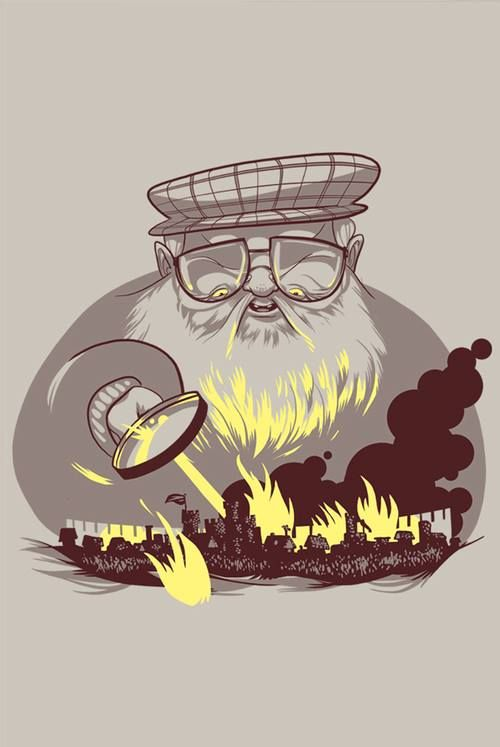

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 86.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 124MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
data = pd.read_csv("game_of_thrones_train.csv", index_col="S.No")
data_test = pd.read_csv("game_of_thrones_test.csv", index_col="S.No")

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

**!!! Здесь я не заполняю столбцы, которые собираюсь удалить ниже (см. Задание 1.5)**

In [ ]:
known_titles = data['title'].dropna().unique()
latin_numerals = [' I ', ' II', ' III', ' IV', ' V ']

def find_title(name):
    for title in known_titles:
        if title in name:
            return title
    for numeral in latin_numerals:
        if numeral in name:
            return 'Lord'
    return np.nan

data['title'] = data.apply(lambda row: find_title(row['name']) if pd.isna(row['title']) else row['title'], axis=1)
data_test['title'] = data_test.apply(lambda row: find_title(row['name']) if pd.isna(row['title']) else row['title'], axis=1)

In [ ]:
data['title'] = data['title'].fillna('Unknown')
data_test['title'] = data_test['title'].fillna('Unknown')

In [ ]:
data['isAliveFather'] = data['isAliveFather'].fillna(data['isAliveFather'].mode()[0])
data_test['isAliveFather'] = data_test['isAliveFather'].fillna(data_test['isAliveFather'].mode()[0])

In [ ]:
data['isAliveMother'] = data['isAliveMother'].fillna(data['isAliveMother'].mode()[0])
data_test['isAliveMother'] = data_test['isAliveMother'].fillna(data_test['isAliveMother'].mode()[0])

In [ ]:
data['isAliveHeir'] = data['isAliveHeir'].fillna(data['isAliveHeir'].mode()[0])
data_test['isAliveHeir'] = data_test['isAliveHeir'].fillna(data_test['isAliveHeir'].mode()[0])

In [ ]:
data['isAliveSpouse'] = data['isAliveSpouse'].fillna(data['isAliveSpouse'].mode()[0])
data_test['isAliveSpouse'] = data_test['isAliveSpouse'].fillna(data_test['isAliveSpouse'].mode()[0])

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


### Создание признака *isPopular*

In [ ]:
data['isPopular'] = (data['popularity'] >= 0.4).astype(int)
data = data.drop(columns=['popularity'])

data_test['isPopular'] = (data_test['popularity'] >= 0.4).astype(int)
data_test = data_test.drop(columns=['popularity'])

### Создание признака *boolDeadRelations*

In [ ]:
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)
data_test['boolDeadRelations'] = (data_test['numDeadRelations'] > 0).astype(int)

In [ ]:
data = data.drop(columns=['numDeadRelations'])
data_test = data_test.drop(columns=['numDeadRelations'])

### Изменение признака *culture*

In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Ironmen': ['ironborn'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Lhazarene': ['Lhazareen'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'Dorne', 'dornish', 'Dornishmen', 'dorne'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westerman': ['westermen', 'westerman', 'westerlands', 'Westermen', 'Westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Summer Islander': ['Summer Islands', 'Summer Iles'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen', 'Northern mountain clans'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [ ]:
reverse_cult = {variant: key for key, variants in cult.items() for variant in variants}

In [ ]:
data['culture'] = data['culture'].map(reverse_cult).fillna(data['culture'])
data_test['culture'] = data_test['culture'].map(reverse_cult).fillna(data_test['culture'])

In [ ]:
# Считаем частоту каждого значения
value_counts = data['culture'].value_counts()

# Определяем порог
top_n = 10
top_values = value_counts.head(top_n).index

# Заменяем редкие значения на 'Rare'
data['culture'] = data['culture'].apply(lambda x: x if x in top_values else 'Rare')
data_test['culture'] = data_test['culture'].apply(lambda x: x if x in top_values else 'Rare')

### Изменение признака *title*

In [ ]:
# Словарь для категорий
categories = {
    'Unknown': ['unknown'],
    'prince': ['Prince', 'princess'],
    'Lord': ['lord', 'lady'],
    'Ser': ['ser', 'knight'],
    'Maester': ['maester'],
    'Rare': ['rare']  # Сюда попадут все остальные значения
}

# Функция для определения категории
def categorize_title(title):
    title_lower = title.lower()  # Приводим к нижнему регистру для унификации
    for category, keywords in categories.items():
        if any(keyword in title_lower for keyword in keywords):
            return category
    return 'Rare'  # Если не найдено совпадений, относим к Rare

# Применяем функцию к столбцу title
data['title'] = data['title'].apply(categorize_title)
data_test['title'] = data_test['title'].apply(categorize_title)

### Изменение признака house

In [ ]:
import re

def fill_house(row):
    if pd.isna(row['house']):
        # Удаляем профессию в скобках, если она есть
        name_without_profession = re.sub(r'\s*\(.*\)', '', row['name'])
        # Разделяем оставшееся имя на части
        name_parts = name_without_profession.split()
        if len(name_parts) > 1:
            return name_parts[-1]  # Возвращаем последнее слово как фамилию
        else:
            return 'Unknown'
    else:
        return row['house']

data['house'] = data.apply(fill_house, axis=1)
data_test['house'] = data_test.apply(fill_house, axis=1)
data['house'] = data['house'].str.replace(r'\bHouse of\b|\bHouse\b', '', regex=True).str.strip()
data_test['house'] = data_test['house'].str.replace(r'\bHouse of\b|\bHouse\b', '', regex=True).str.strip()

In [ ]:
# Считаем частоту каждого значения
value_counts = data['house'].value_counts()

top_n = 20
top_values = value_counts.head(top_n).index

# Заменяем редкие значения на 'Rare'
data['house'] = data['house'].apply(lambda x: x if x in top_values else 'Rare')
data_test['house'] = data_test['house'].apply(lambda x: x if x in top_values else 'Rare')

### Создание dateOfDeath

In [ ]:
data['dateOfDeath'] = data['dateOfBirth'] + data['age']
data = data.drop(columns=['age', 'dateOfBirth'])

In [ ]:
data_test['dateOfDeath'] = data_test['dateOfBirth'] + data_test['age']
data_test = data_test.drop(columns=['age', 'dateOfBirth'])

In [ ]:
current_year = data['dateOfDeath'].max()

data['wasDeadLastYear'] = data['dateOfDeath'] < current_year
data = data.drop(columns=['dateOfDeath'])

data_test['wasDeadLastYear'] = data_test['dateOfDeath'] < current_year
data_test = data_test.drop(columns=['dateOfDeath'])

In [ ]:
data['wasDeadLastYear'] = data['wasDeadLastYear'].fillna(data['wasDeadLastYear'].mode()[0])
data_test['wasDeadLastYear'] = data_test['wasDeadLastYear'].fillna(data_test['wasDeadLastYear'].mode()[0])

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
data = data.drop(columns=['name', 'mother', 'father', 'heir', 'spouse'])
data_test = data_test.drop(columns=['name', 'mother', 'father', 'heir', 'spouse'])

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [ ]:
data['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
cat_features = ['house', 'title', 'culture']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

one_hot_encoded = encoder.fit_transform(data[cat_features])
one_hot_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_features), index=data.index)

one_hot_encoded_test = encoder.transform(data_test[cat_features])
one_hot_data_test = pd.DataFrame(one_hot_encoded_test, columns=encoder.get_feature_names_out(cat_features), index=data_test.index)

In [ ]:
data_encoded = pd.concat([data, one_hot_data], axis=1)
data_encoded = data_encoded.drop(cat_features, axis=1)

data_encoded_test = pd.concat([data_test, one_hot_data_test], axis=1)
data_encoded_test = data_encoded_test.drop(cat_features, axis=1)

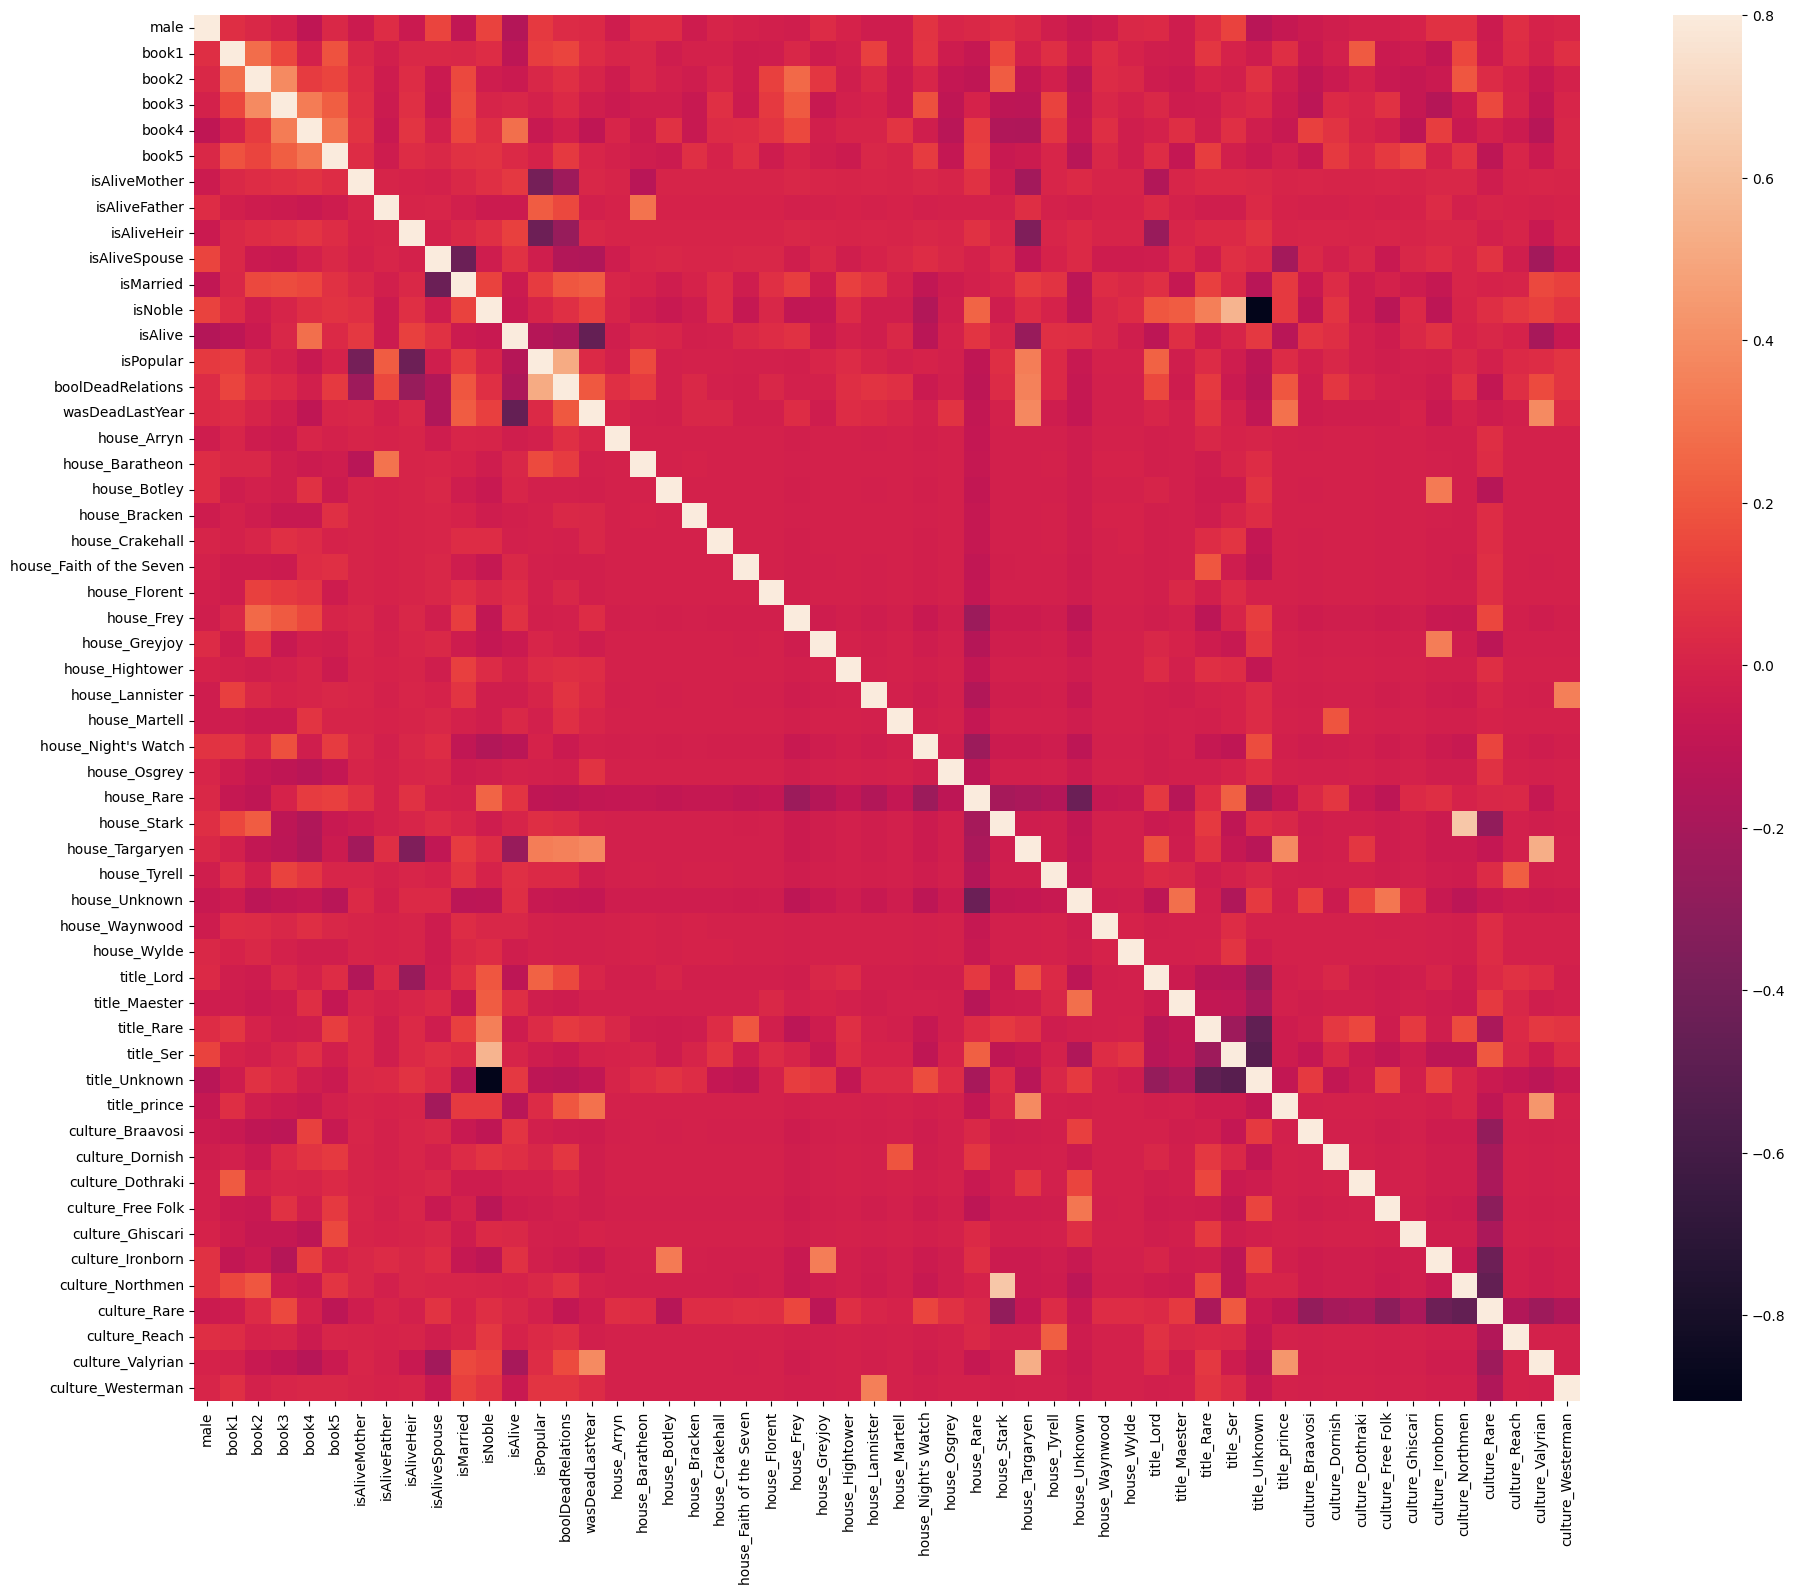

In [ ]:
corrmat = data_encoded.corr()
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(corrmat, vmax=.8, square=True);

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
target_corr = corrmat['isAlive'].sort_values(ascending=True).drop('isAlive', axis=0)

<ipython-input-101-9e279cc88d8f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette='viridis')  # Меняем оси местами


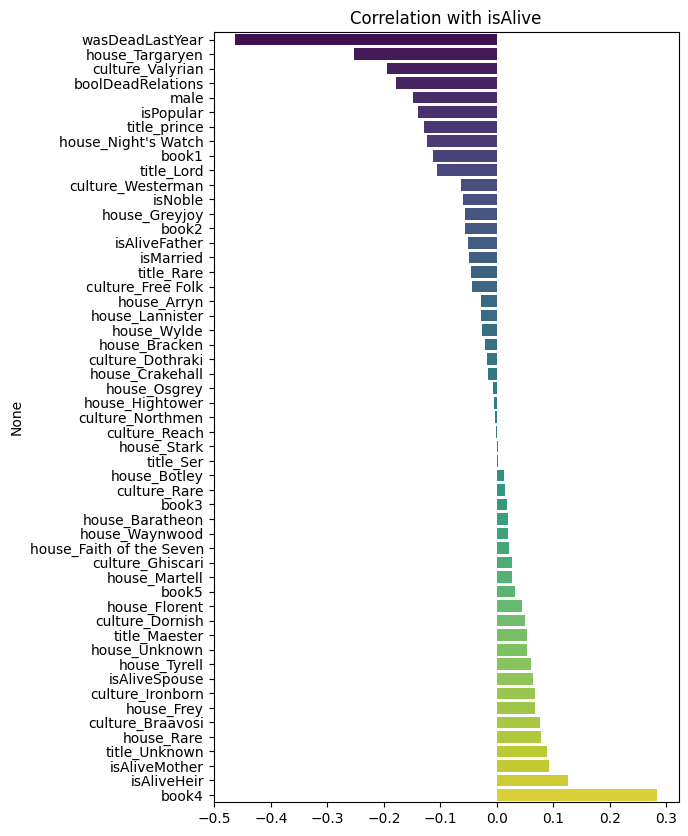

In [ ]:
plt.figure(figsize=(6, 10))  # Меняем размер фигуры для удобства
sns.barplot(x=target_corr.values, y=target_corr.index, palette='viridis')  # Меняем оси местами
plt.yticks(rotation=0)  # Поворачиваем подписи на оси Y (если нужно)
plt.title("Correlation with isAlive")
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = data_encoded.drop('isAlive', axis=1)
y = data_encoded['isAlive']

In [ ]:
X_t = data_encoded_test

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
from sklearn.gaussian_process.kernels import RBF

# Шаг 1. создание модели
ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
gaussian_process = GaussianProcessClassifier(kernel=1.0 * RBF(1.0), random_state=42)
gaussian_nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
svc = SVC(kernel='linear', C=1.0, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)


# Шаг 2. обучение модели
ada_boost.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gaussian_process.fit(X_train, y_train)
gaussian_nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных
y_pred_ada = ada_boost.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_gp = gaussian_process.predict(X_test)
y_pred_nb = gaussian_nb.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8429


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_ada = ada_boost.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_gp = gaussian_process.predict(X_test)
y_pred_nb = gaussian_nb.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)


# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Accuracy : %.4f" % accuracy_ada)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy : %.4f" % accuracy_rf)
accuracy_gp = accuracy_score(y_test, y_pred_gp)
print("Gaussian Process Accuracy : %.4f" % accuracy_gp)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Gaussian Naive Bayes Accuracy : %.4f" % accuracy_nb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Accuracy : %.4f" % accuracy_knn)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Support Vector Classifier Accuracy : %.4f" % accuracy_svc)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy : %.4f" % accuracy_dt)

AdaBoost Accuracy : 0.8526
Random Forest Accuracy : 0.8590
Gaussian Process Accuracy : 0.8718
Gaussian Naive Bayes Accuracy : 0.8237
K-Nearest Neighbors Accuracy : 0.8365
Support Vector Classifier Accuracy : 0.8462
Decision Tree Accuracy : 0.8205


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 13.4MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission = pd.DataFrame(gaussian_process.predict(X_t), index=X_t.index)

In [ ]:
submission['isAlive'] = submission[0]

In [ ]:
submission = submission.drop(0, axis=1)

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)